# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #28 Map, Filter and Reduce Functions

In [1]:
%run video-00.py

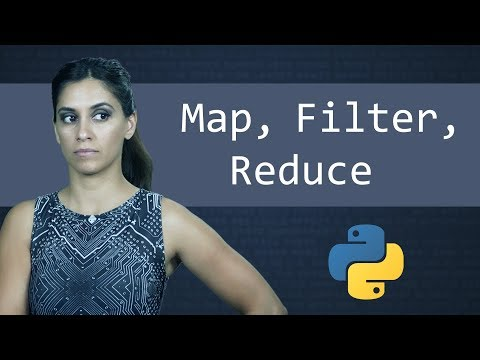

In [2]:
from IPython import display

video = display.YouTubeVideo('hUes6y2b--0')
video
display.HTML(f'<a href="{video.src}">link</a>')

The names _map_, _filter_ and _reduce_ are all indicating operations regarded as [higher-order functions](https://en.wikipedia.org/wiki/Higher-order_function) in the context of [functional programming](https://en.wikipedia.org/wiki/Functional_programming).

>In mathematics and computer science, a **higher-order function** is a function that does at least one of the following:
>
> - takes one or more functions as arguments (i.e. [procedural parameters](https://en.wikipedia.org/wiki/Procedural_parameter)),
> - returns a function as its result.
>
>All other functions are _first-order functions_.

The `map()`, `filter()` and `reduce()` functions in Python take a function (or a lambda) as an argument.

In [3]:
import functools

help(map)
help(filter)
help(functools.reduce)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.

Help on class filter in module builtins:

class filter(object)
 |  filter(function or None, iterable) --> filter object
 |  
 |  Return an iterator yielding those items of iterable for which function(item)
 |  is

### Map

A [_map_](https://en.wikipedia.org/wiki/Map_(higher-order_function)) applies a function to every item in a set or sequence, generating a set or sequence of the same size. In the world of functional programming, the map represents the [_functor_](https://en.wikipedia.org/wiki/Functor_(functional_programming)) design pattern.

To see what life is like without [functional programming design patterns](https://docs.python.org/3/howto/functional.html), let us calculate the areas of circles from a list of radii:

In [4]:
import math

def area(r):
    '''Area of a circle with radius `r`.'''
    return math.pi * r**2

radii = [2, 5, 7.1, .3, 10]

# Method 1: direct method
areas = []
for r in radii:
    areas.append(area(r))

areas

[12.566370614359172,
 78.53981633974483,
 158.36768566746147,
 0.2827433388230814,
 314.1592653589793]

Now we use the `map()` function:

In [5]:
# Method 2: use `map` function
map(area, radii)

It would be reasonable to expect `map()` to return `list` but it does not. Instead, the `map` object returns implements `__iter__` [📖 [docs](https://docs.python.org/3/reference/datamodel.html#object.__iter__)] which means it can be constructed by `list`:

In [6]:
list(map(area, radii))

[12.566370614359172,
 78.53981633974483,
 158.36768566746147,
 0.2827433388230814,
 314.1592653589793]

We can eliminate the use of a function and just use a lambda:

In [7]:
list(map(lambda r: math.pi * r**2, radii))

[12.566370614359172,
 78.53981633974483,
 158.36768566746147,
 0.2827433388230814,
 314.1592653589793]

### Filter

Like _map_, a [_filter_](https://en.wikipedia.org/wiki/Filter_(higher-order_function)) iterates over every item in a set or sequence. The _filter_, however, uses a [predicate](https://en.wikipedia.org/wiki/Predicate_(computer_programming)) function (or lambda) to return a new set or sequence with items that caused the predicate to return `True`.

Lets use the `statistics.mean` function to help filter out the above-average results in a sequence of data:

In [8]:
import statistics

data = [1.3, 2.7, .8, 4.1, 4.3, -.1]
avg = statistics.mean(data)
avg

2.183333333333333

In [9]:
list(filter(lambda x: x > avg, data))

[2.7, 4.1, 4.3]

Passing `None` as the predicate to `filter` is a quick and dirty way to remove values that evaluate to `False`:

In [10]:
countries_and_stuff = [
    '',
    "Argentina",
    0.0,
    [],
    'Brazil',
    {},
    None,
    'Chile',
    'Columbia',
    'Ecuador',
    False,
    0j,
    'Venezuela',
    0,
    ""
]

list(filter(None, countries_and_stuff))

['Argentina', 'Brazil', 'Chile', 'Columbia', 'Ecuador', 'Venezuela']

### Reduce

To [_reduce_](https://en.wikipedia.org/wiki/Fold_(higher-order_function)) a set or sequence is to yield a single value by iterating _and accumulating_ over this set or sequence.

The syntax of `reduce()` is not regarded as Pythonic by Guido:

<div style="text-align:center">

![Guido van Rossum](./video-28.png)

</div>

This might explain why `reduce()` has been moved to `functools` in Python 3.x.

In [11]:
# compare math.factorial to functools.reduce

math.factorial(4)
functools.reduce(lambda x, y: x*y, [1, 2, 3, 4])

24

24

In [12]:
# does the `for` loop equivalent look better?

product = 1
for x in [1, 2, 3, 4]:
    product = product * x

product

24